In [1]:
from collections import defaultdict
from matplotlib import pyplot as plt

"Classification Schemas for Artificial Intelligence Failures" explains a tag-based schma for AI failures. This basically means that each AI failure receives any number of tags which indicate various things. Some are mutually exclusive and together they form a set of axis which place each failure in some n-dimensional space, but all tags are optional so not really? Let's get the data before we get too confused.

In [2]:
failures = (
    ("Therac-25 radiation therapy overdose cases", 33, ("CIP", "AN", "PS", "LD", "LE", "LO")),
    ("robot accidentally punctured a container of bear spray", 34, ("CIP", "AN", "PS", "LT")),
    ("outcome of an industrial accident a Chinese factory worker was impaled with ten footlong spikes", 35, ("CIP", "AN", "PT", "LD")),
    ("1984 when an operator was killed by a 2,500 lb robot that came behind him with no warning", 36, ("CIP", "AN", "PS", "LD")),
    ("A car production plant robot grabbed a worker instead of a part and crushed him against a metal plate, killing him", 37, ("CIP", "AN", "PS", "LD")),
    ("an Uber incorrectly classifying a pedestrian as a false positive match because too many reactions to actual false positives resulted in a jerky ride", 38, ("CIP", "AN", "PS", "LT")),
    ("a Tesla crashing after requesting driver intervention", 39, ("CIP", "CCF", "AA", "PD", "LE")),
    ("In medicine, IBM's Watson recommended `unsafe' cancer treatments", 40, ("CIP", "CCF", "AA", "PD", "LT", "LO")),
    ("a study of 14 years of robotic surgery concluded that `a non-negligible number of [preventable] technical difficulties and complications are still being experienced during procedures.'", 41, ("CIP", "CCF", "AA", "PS", "LD")),
    ("The May 2010 `Flash Crash' resulted in the Dow Jones Industrial Average dropping about 9% for 36 minutes and resulted from program trading algorithms being inadequately prepared to deal with large volumes of strategically-placed trades which themselves were computer-mediated malice", 42, ("CIF", "CCF", "AA", "AM", "PD", "LD", "LT")),
    ("A major concern in the application of AI is privacy. Consumer devices connected to corporate clouds of identity data come under scrutiny, especially when, for instance, an Amazon Alexa node recorded a private conversation and sent it to a random contact", 44, ("CIE", "AA", "PS", "LT", "LO")),
    ("an iPhone bug allowed users to listen on others' conversations via FaceTime", 45, ("CIE", "AA", "PS", "LT")),
    ("In some cases, the technology facilitated a casual violation of privacy such as when Uber users' locations and identities were displayed on a screen at a launch party", 46, ("CIE", "AI", "PT", "LC")),
    ("Privacy violations carry more serious consequences when they become misidentifications. The ACLU demonstrated that when they showed that Amazon facial recognition would flag certain members of Congress as wanted criminals", 47, ("CYF", "CYS", "AN", "PS", "LD")),
    ("A lack of training data (and implicit bias) resulted in facial recognition systems being unable to see black people48 or tagging them as gorillas", 49, ("CIE", "CYS", "AN", "PD", "LD")),
    ("Facial recognition used by police in the United Kingdom has been recorded making many false positive identifications", 50, ("CIE", "CIF", "CYF", "CYS", "AN", "PS", "LT", "LO")),
    ("And in China, facial recognition systems deployed for automated misdemeanor ticketing publicly shamed a woman as a jaywalker when mistaking her photo on the side of a bus for the woman herself", 51, ("CIE", "CIF", "AN", "PD", "LE")),
    ("a driver was ticketed for using a cellphone when he was actually scratching his face", 52, ("CIE", "CIF", "AN", "PD", "LE")),
    ("Traffic cameras in New Orleans ticketed parked cars for speeding", 53, ("CIF", "AN", "PS", "LD", "LO")),
    ("A man was falsely arrested after systems at Apple misidentified him as stealing from its stores", 54, ("CIP", "CIM", "CIE", "CIF", "CCF", "AA", "PS", "LE")),
    ("Not all misidentifications result in such obvious harm. Artist Tom White specialises in creating abstract (and very unarousing) art that is flagged as unacceptable nudity by social media AI.55 This machine myopia indicates that the development of useful image censorship is not yet realised and some inoffensive art is suppressed. ", 0, ("CIM", "CIF", "AA", "PD", "LD")),
    ("a report concluded that AIs trained on hiring decisions would replicate or amplify human bias,56 Amazon's hiring AI turned out to be sexist,57 and the COMPAS system used in Wisconsin to predict recidivism was biased against blacks", 58, ("CIE", "CIF", "CYC", "AA", "PD", "LE")),
    ("AI there blocks mention of the Tiananmen Square massacre on social media", 63, ("CYS", "AI", "PT", "LC")),
    ("China has a `social credit' scoring system reminiscent of a Black Mirror episode,64 linked to social media and consumer systems such as Sesame Credit,65 that will ban people from certain venues like flights and hotels for poor scores, which may be incurred by undesirable behaviour such as buying video games ", 0, ("CYC", "AI", "PT", "LC")),
    ("in China, AI is being used to grade school papers,67 with some good writing being given poor marks ", 0, ("CYS", "AI", "PD", "LO")),
    ("AI is used to monitor the moods of workers68 and the attention paid by children in class69 with the most attentive being rewarded ", 0, ("CIM", "CYC", "AI", "PT", "LC")),
    ("`deep fake' videos,85 which could be used to automate blackmail at scale", 86, ("CIM", "CYS", "AM", "PU", "LO")),
    ("A hardware design bug allowed memory protection violations in years' worth of Intel chips", 87, ("CCF", "AA", "PD", "LD")),
    ("Microsoft's Tay chatbot became racist within hours of being deployed to learn from other Twitter users", 88, ("CYS", "AA", "PS", "LC", "LD")),
    ("smart scooters for hire were hacked to display obscene messages and be used without payment", 92, ("CCF", "AM", "PS", "LE")),
    ("and Domino's Pizza affiliation app was fooled into granting points by fake pictures of pizza", 93, ("CCF", "AM", "PD", "LC")),
    ("And the Sophia robot attracts a degree of adulation far beyond its real capabilities.95 The threat here is to the reputation of AI and its community ", 0, ("CYF", "CYC", "AI", "PU", "LO")),
    ("AI that is unintentionally insensitive also damages its own reputation, such as the AI that thought that house burning down was `spectacular'96 and Paypal's virtual assistant which insensitively replied, `Great!' when someone told it, `I got scammed'", 97, ("CIE", "AA", "PS", "LE")),
    ("The Starbucks shift-scheduling software was also insensitive when it optimised for hour-by-hour business needs but assigned workers to unpredictable and erratic schedules", 98, ("CIP", "CIF", "CCC", "AN", "PT", "LD")),
    ("AI that is trusted without verification may not live up to that trust, such as when a model used to grade the `value-add' imparted by New York City teachers was found to generate essentially random results", 99, ("CIM", "CIE", "CIF", "AN", "PS", "LT")),
    ("A corporate employment workflow system was unstoppable in terminating an employee erroneously flagged as superfluous;100 after three weeks spent fixing the error he declined to return to the firm ", 0, ("CIE", "CIF", "CCF", "AA", "PS", "LD")),
    ("Apple's Siri's initial response to the request `Call me an ambulance' was to refer to the user thereafter as `ambulance'", 102, ("CIP", "AA", "PS", "LE")),
    ("When a text generator created weird descriptions of Bitcoin103, and an AI's predicted YouTube pornography searches, the results were so funny as to be equally disarming ", 0, ("CYC", "AA", "PS", "LD")),
    ("A trivial typo in the code for a game agent made it much easier to beat than it should have been", 105, ("CIM", "AA", "PT", "LT")),
    ("A Roomba spread dog poop all over a house", 106, ("CIP", "CIF", "AA", "PS", "LE")),
    ("A sign printed in Welsh translated to `I am not in the office at the moment. Send any work to be translated.'", 107, ("CYC", "AN", "PT", "LO")),
    ("The `swarm intelligence' UNU failed to predict the results of the Kentucky Derby the second time around after previously winning the superfecta.", 108, ("CIF", "AA", "PD", "LE")),
    ("A neural network hallucinated sheep in images where there were none, or mislabelled them when they were placed in (admittedly unusual) locations", 109, ("CIM", "AA", "PS", "LE")),
    ("Colossus: The Forbin Project, where the AI imprisons humanity to end conflict ", 0, ("CIM", "CIE", "CYS", "CYC", "AN", "AI", "PD", "LC", "LO")),
    ("One of the least apocalyptic failures was explored in the 2013 film Her, where virtual assistant AIs have unforeseen intimate relationships with many humans who are largely changed for the better ", 0, ("CIE", "AA", "PD", "LD")),
    ("2. Hypothetical Failures A video producer depicted a fictional future where an artificial superintelligence charged with copyright enforcement hacked people's brains with nanotechnology to correct violations", 126, ("CIM", "CYC", "AI", "PD", "LO")),
    ("It was demonstrated that a DNA sequencer could be hacked through (currently non-existent) flaws in a compression algorithm", 127, ("CIP", "AM", "PD", "LE")),
    ("Most shows that explore AI failure develop a theme epitomised by Terminator series: a massive AI becomes self-aware and attempts to destroy humanity. ", 0, ("CIP", "CIE", "CIF", "CCF", "CYF", "CYS", "CYC", "AN", "AI", "PD", "LC", "LO")))


In [3]:
agency_tags = (("AA", "Accidental"), ("AN", "Negligent"), ("AI", "Innocuous"), ("AM", "Malicious"))
preventability_tags = (("PT", "Trivially preventable"), ("PS", "Preventable with some difficulty"),
        ("PD", "Preventable with great difficulty"), ("PU", "Unpreventable"))
lifecycle_tags = (("LC", "Concept"), ("LD", "Design"), ("LE", "Development"),
        ("LT", "Testing"), ("LO", "Operation"), ("LG", "Decommissioning"))
consequence_tags = (("CIP", "Individual Physical"), ("CIM", "Individual Mental"),
        ("CIE", "Individual Emotional"), ("CIF", "Individual Financial"),
        ("CCF", "Corporation Financial"), ("CYF", "Community Financial"),
        ("CYS", "Community Social"), ("CYC", "Community Cultural"),
        ("CCC", "Corporation Cultural"))

Let's see how many of the datapoints have at least on of each dimension of tags.
It looks like there's at least one of each of everything, so we need to make a histogram 

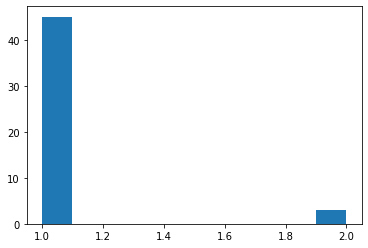

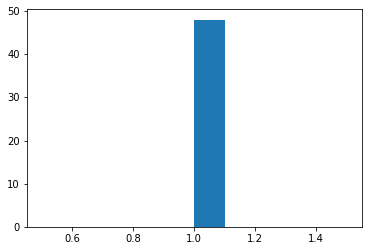

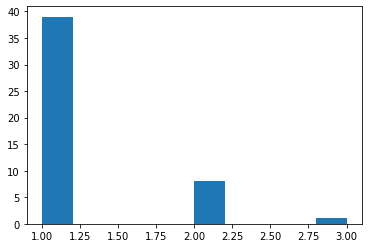

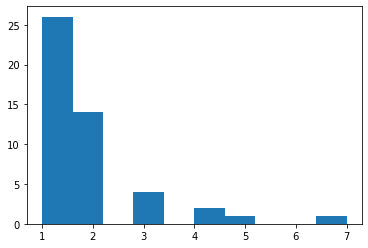

In [16]:
for some_tags in [agency_tags, preventability_tags, lifecycle_tags, consequence_tags]:
    counts = []
    for (text, p, tags) in failures:
        count = 0
        for (tag, name) in some_tags:
            if tag in tags:
                count += 1
        counts.append(count)
    plt.hist(counts)
    plt.show()

(array([26., 14.,  0.,  4.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

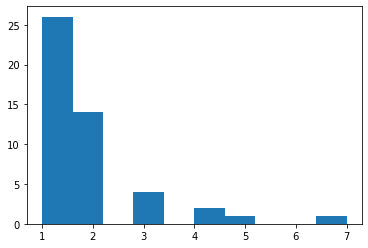

In [26]:
body = "<!DOCTYPE html><html><body>\n"
for some_tags, name in [(agency_tags, "Agency"), 
                        (preventability_tags, "Preventability"),
                        (lifecycle_tags, "Lifecycle"),
                        (consequence_tags, "Consequence")]:
    body += f"<p>Select {name} levels:</p>\n"
    for tag, description in some_tags:
        body += f'<input type="checkbox" id="male" name="{name.lower()}" value="{tag}">\n'
        body += f'<label for="{tag}">{description} ({tag})</label><br>\n'
    body += '<br>\n'
body += "</body></html>"
print(body)

<!DOCTYPE html><html><body>
<p>Select Agency levels:</p>
<input type="checkbox" id="male" name="agency" value="AA">
<label for="AA">Accidental (AA)</label><br>
<input type="checkbox" id="male" name="agency" value="AN">
<label for="AN">Negligent (AN)</label><br>
<input type="checkbox" id="male" name="agency" value="AI">
<label for="AI">Innocuous (AI)</label><br>
<input type="checkbox" id="male" name="agency" value="AM">
<label for="AM">Malicious (AM)</label><br>
<br>
<p>Select Preventability levels:</p>
<input type="checkbox" id="male" name="preventability" value="PT">
<label for="PT">Trivially preventable (PT)</label><br>
<input type="checkbox" id="male" name="preventability" value="PS">
<label for="PS">Preventable with some difficulty (PS)</label><br>
<input type="checkbox" id="male" name="preventability" value="PD">
<label for="PD">Preventable with great difficulty (PD)</label><br>
<input type="checkbox" id="male" name="preventability" value="PU">
<label for="PU">Unpreventable (PU)</

In [27]:
num_to_link = {
    34: "https://www.engadget.com/2018/12/06/amazon-workers-hospitalized-robot",
    35: "https://www.thesun.co.uk/news/7954270/factory-robot-malfunctions-and-impales-worker-with-10-foot-long-steel-spikes/",
    37: "https://www.theguardian.com/world/2015/jul/02/robot-kills-worker-at-volkswagen-plant-in-germany",
    38: "https://arstechnica.com/tech-policy/2018/05/report-software-bug-led-to-death-in-ubers-self-driving-crash/",
    39: "https://www.washingtonpost.com/news/dr-gridlock/wp/2018/04/01/ntsb-unhappy-with-tesla-release-of-investigative-information-in-fatal-crash/",
    40: "https://www.statnews.com/2018/07/25/ibm-watson-recommended-unsafe-incorrect-treatments/",
    41: "https://en.wikipedia.org/wiki/2010_Flash_Crash",
    42: "https://www.investopedia.com/articles/investing/011116/two-biggest-flash-crashes-2015.asp",
    44: "https://www.fox13memphis.com/news/trending-now/amazon-alexa-recorded-private-conversation-sent-it-to-random-contact-woman-says/755720160",
    45: "https://www.bloomberg.com/news/articles/2019-01-29/apple-bug-lets-iphone-users-listen-in-on-others-via-facetime",
    46: "https://www.forbes.com/sites/kashmirhill/2014/10/03/god-view-uber-allegedly-stalked-users-for-party-goers-viewing-pleasure/#4b7dd5593141",
    47: "https://arstechnica.com/tech-policy/2018/07/amazons-rekognition-messes-up-matches-28-lawmakers-to-mugshots/",
    48: "https://www.ajlunited.org/",
    49: "https://www.theguardian.com/technology/2015/jul/01/google-sorry-racist-auto-tag-photo-app",
    50: "https://www.wired.co.uk/article/face-recognition-police-uk-south-wales-met-notting-hill-carnival",
    51: "https://www.abacusnews.com/digital-life/facial-recognition-camera-catches-top-businesswoman-jaywalking-because-her-face-was-bus/article/2174508",
    52: "https://9gag.com/gag/av8VBdd/chinese-driver-fined-for-scratching-his-face-after-passing-ai-traffic-camera",
    53: "https://www.foxnews.com/auto/traffic-camera-in-new-orleans-giving-speeding-tickets-to-parked-cars",
    54: "https://www.bbc.com/news/technology-48022890",
    55: "https://www.artnome.com/news/2018/12/6/ai-artists-expose-kinks-in-algorithmic-censorship",
    56: "https://www.brookings.edu/research/algorithmic-bias-detection-and-mitigation-best-practices-and-policies-to-reduce-consumer-harms/",
    57: "https://www.telegraph.co.uk/technology/2018/10/10/amazon-scraps-sexist-ai-recruiting-tool-showed-bias-against/",
    58: "https://www.theatlantic.com/technology/archive/2018/01/equivant-compas-algorithm/550646/",
    59: "https://www.vice.com/en_us/article/78k7de/why-an-ai-judged-beauty-contest-picked-nearly-all-white-winners",
    60: "https://www.telegraph.co.uk/technology/2016/12/07/robot-passport-checker-rejects-asian-mans-photo-having-eyes/",
    62: "https://www.reuters.com/article/us-china-facialrecognition-analysis/backing-big-brother-chinese-facial-recognition-firms-appeal-to-funds-idUSKBN1DD00A",
    63: "https://www.fastcompany.com/90355806/now-ai-easily-erases-the-tiananmen-square-massacre-from-online-memory",
    65: "https://en.wikipedia.org/wiki/Social_Credit_System",
    66: "https://www.theguardian.com/commentisfree/2018/mar/05/algorithms-rate-credit-scores-finances-data",
    67: "https://www.scmp.com/news/china/society/article/2147833/chinas-schools-are-quietly-using-ai-mark-students-essays-do",
    68: "https://www.telegraph.co.uk/news/2018/04/30/mind-reading-tech-used-monitor-chinese-workers-emotions/",
    69: "https://supchina.com/2019/04/05/chinese-parents-want-students-to-wear-dystopian-brainwave-detecting-headbands/",
    72: "https://edition.cnn.com/2019/01/08/health/ai-technology-to-identify-genetic-disorder-from-facial-image-intl/index.html",
    73: "https://theintercept.com/2018/12/03/air-travel-surveillance-homeland-security/",
    74: "https://ec.europa.eu/research/infocentre/article_en.cfm?artid=49726",
    75: "https://www.washingtonpost.com/news/innovations/wp/2016/05/24/terrorist-or-pedophile-this-start-up-says-it-can-out-secrets-by-analyzing-faces/",
    76: "https://royalsociety.org/~/media/about-us/programmes/science-and-law/royal-society-forensic-gait-analysis-primer-for-courts.pdf",
    77: "https://www.predpol.com/",
    78: "http://www.palantir.com/",
    79: "https://www.ted.com/talks/tristan_harris_the_manipulative_tricks_tech_companies_use_to_capture_your_attention",
    80: "https://www.theguardian.com/world/2014/jul/08/darpa-social-networks-research-twitter-influence-studies",
    81: "https://www.vice.com/en_us/article/7x3g4x/pentagon-wants-to-predict-anti-trump-protests-using-social-media-surveillance",
    83: "https://www.bbc.com/news/av/world-43472347/cambridge-analytica-planted-fake-news",
    84: "https://www.technologyreview.com/s/608561/first-evidence-that-social-bots-play-a-major-role-in-spreading-fake-news/",
    85: "https://www.nbcnews.com/tech/tech-news/viral-schwarzenegger-deepfake-isn-t-just-entertaining-it-s-warning-n1016851",
    86: "https://medium.com/@paubric/deepfake-ransomware-oaas-part-1-b6d98c305cd9",
    87: "https://techcrunch.com/2019/05/14/zombieload-flaw-intel-processors/",
    88: "https://www.theguardian.com/technology/2016/mar/24/tay-microsofts-ai-chatbot-gets-a-crash-course-in-racism-from-twitter",
    89: "https://arstechnica.com/information-technology/2019/02/digital-exchange-loses-137-million-as-founder-takes-passwords-to-the-grave/",
    90: "https://www.popsci.com/wikipedia-bots-fighting/",
    91: "https://www.alexirpan.com/2018/02/14/rl-hard.html",
    92: "https://gizmodo.com/lime-scooters-hacked-to-say-sexual-things-to-riders-in-1834264534",
    93: "https://www.vice.com/en_us/article/kzdkgw/take-pictures-of-fake-pizzas-to-get-a-free-pizza-from-dominos",
    94: "https://thespinoff.co.nz/the-best-of/06-03-2018/the-mystery-of-zach-new-zealands-all-too-miraculous-medical-ai/",
    95: "https://www.forbes.com/sites/noelsharkey/2018/11/17/mama-mia-its-sophia-a-show-robot-or-dangerous-platform-to-mislead/#4fabeea87ac9",
    96: "https://www.ted.com/talks/margaret_mitchell_how_we_can_build_ai_to_help_humans_not_hurt_us/transcript",
    97: "https://www.facebook.com/photo.php?fbid=10217225240875399",
    98: "https://www.nytimes.com/interactive/2014/08/13/us/starbucks-workers-scheduling-hours.html",
    99: "http://garyrubinstein.teachforus.org/2012/02/28/analyzing-released-nyc-value-added-data-part-2/",
    100: "https://www.bbc.com/news/technology-44561838",
    101: "https://www.news.com.au/technology/science/space/cimon-the-international-space-stations-artificial-intelligence-has-turned-belligerent/news-story/953a84bc8c4fe414eed2d0550e1d8bf4",
    102: "https://www.technologyreview.com/s/601897/tougher-turing-test-exposes-chatbots-stupidity/",
    103: "https://www.vice.com/en_us/article/xwmy9a/watch-botnik-ai-bitcoin-explainer",
    104: "https://www.vice.com/en_us/article/bj54xv/ai-predicted-the-future-of-porn-searches-and-we-cant-stop-laughing-vgtrn",
    105: "https://arstechnica.com/gaming/2018/07/a-years-old-one-letter-typo-led-to-aliens-colonial-marines-awful-ai/",
    106: "https://www.facebook.com/jesse.newton.37/posts/776177951574",
    107: "http://news.bbc.co.uk/2/hi/7702913.stm",
    108: "https://fortune.com/2017/05/07/artificial-intelligence-kentucky-derby-predictions/",
    109: "https://aiweirdness.com/post/171451900302/do-neural-nets-dream-of-electric-sheep",
    110: "https://www.sciencealert.com/amazon-echo-devices-are-creepily-laughing-at-people",
    111: "https://vkrakovna.wordpress.com/2018/04/02/specification-gaming-examples-in-ai/",
    112: "https://techcrunch.com/2018/12/31/this-clever-ai-hid-data-from-its-creators-to-cheat-at-its-appointed-task/",
    113: "https://www.wired.com/story/ai-text-generator-too-dangerous-to-make-public/",
    114: "https://aiweirdness.com/post/172894792687/when-algorithms-surprise-us",
    126: "https://www.youtube.com/watch?v=-JlxuQ7tPgQ",
    129: "https://www.youtube.com/watch?v=9CO6M2HsoIA",
    130: "https://autonomousweapons.org/",
    133: "https://www.youtube.com/watch?v=9CO6M2HsoIA",
    134: "https://tvm.ai/2018/10/09/ml-in-tees.html",
    142: "https://joeybose.github.io/assets/adversarial-attacks-face.pdf",
    143: "https://aiweirdness.com/post/184781529122/what-is-the-opposite-of-guacamole"}


In [29]:
num_to_link[143]

'https://aiweirdness.com/post/184781529122/what-is-the-opposite-of-guacamole'